ALIFI LAZUARDI GUNAWAN

BLITAR JAWA TIMUR

## Import Library

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
!pip install opendatasets
import opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Membaca data

In [ ]:
opendatasets.download('https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset?select=rating.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alifilazuardi
Your Kaggle Key: ··········


100%|██████████| 195M/195M [00:09<00:00, 21.1MB/s]


membaca data movies dan rating

In [ ]:
movies = pd.read_csv('/content/movielens-20m-dataset/movie.csv')
ratings = pd.read_csv('/content/movielens-20m-dataset/rating.csv')

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


data movie terdiri atas movieId, title, dan genres

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


data rating terdiri atas userId, movieId, rating dan timestamp

## Univariate Exploratory Data Analysis

melihat data

In [ ]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
5,1,112,3.5,2004-09-10 03:09:00
6,1,151,4.0,2004-09-10 03:08:54
7,1,223,4.0,2005-04-02 23:46:13
8,1,253,4.0,2005-04-02 23:35:40
9,1,260,4.0,2005-04-02 23:33:46


mendapatkan userId dan movieId unik

In [ ]:
movies['movieId'].nunique()

27278

terdapa 27278 movieId unik

In [ ]:
ratings['movieId'].nunique()

26744

In [ ]:
ratings['userId'].nunique()

138493

mengecek missing value dan duplicate value

In [ ]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

tidak ada missing value pada data movies

In [ ]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

tidak ada missing value pada data ratings

In [ ]:
movies.duplicated().sum()

0

tidak ada data duplikat dalam data movies

In [ ]:
ratings.duplicated().sum()

0

tidak ada data duplikat dalam data ratings

## Data preparation

Mengambil sample data rating sebanyak 500000 data

In [ ]:
ratings = ratings.sample(frac=1, random_state=42)
ratings

,userId,movieId,rating,timestamp
17679788,122270,8360,3.5,2012-04-22 01:07:04
7106385,49018,32,2.0,2001-09-11 07:50:36
12970708,89527,109374,3.5,2015-01-06 09:26:40
15426752,106704,1060,3.0,2000-01-22 21:27:57
6934678,47791,1732,2.0,2006-01-19 15:48:23
...,...,...,...,...
9628519,66622,3296,4.0,2003-07-26 02:42:47
14586186,100746,1704,3.5,2003-12-23 19:47:50
2234489,15191,2717,3.5,2014-08-02 18:14:15
13315092,92011,1276,5.0,1997-12-17 09:16:15


In [ ]:
rating = ratings.head(500000)
rating = rating.reset_index()
rating

,index,userId,movieId,rating,timestamp
0,17679788,122270,8360,3.5,2012-04-22 01:07:04
1,7106385,49018,32,2.0,2001-09-11 07:50:36
2,12970708,89527,109374,3.5,2015-01-06 09:26:40
3,15426752,106704,1060,3.0,2000-01-22 21:27:57
4,6934678,47791,1732,2.0,2006-01-19 15:48:23
...,...,...,...,...,...
499995,3089040,21070,3246,4.0,2004-06-01 05:00:37
499996,2711570,18384,595,5.0,2000-01-05 23:57:56
499997,12714597,87866,1375,2.0,2006-04-11 20:38:10
499998,1289230,8785,27803,4.0,2012-01-21 14:06:11


In [ ]:
rating['movieId'].nunique()

13152

In [ ]:
rating['userId'].nunique()

106761

In [ ]:
rating = rating.sort_values(by=['userId'])
rating = rating.reset_index()
rating

,level_0,index,userId,movieId,rating,timestamp
0,303307,171,1,8636,4.5,2005-04-02 23:44:53
1,171693,88,1,2716,3.5,2004-09-10 03:13:32
2,60733,158,1,7153,5.0,2005-04-02 23:30:33
3,367666,29,1,1193,3.5,2005-04-02 23:31:30
4,111301,223,2,3555,4.0,2000-11-21 15:32:28
...,...,...,...,...,...,...
499995,405568,20000150,138493,6874,5.0,2009-10-17 19:08:23
499996,151473,20000050,138493,2787,5.0,2009-10-17 22:08:03
499997,356319,20000197,138493,31696,4.5,2009-10-17 20:21:43
499998,377668,20000155,138493,7008,5.0,2009-10-17 19:55:18


menggabungkan data movies dan rating

In [ ]:
data = pd.merge(movies, rating, on = 'movieId')
data

,movieId,title,genres,level_0,index,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,298489,8676,80,3.0,1997-03-15 20:41:53
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16786,36852,285,2.5,2014-02-16 01:36:11
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,59367,85133,604,3.5,2007-05-15 03:14:36
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,61170,97713,683,5.0,1996-05-14 15:23:39
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,274471,158501,1059,3.0,1996-06-17 09:43:53
...,...,...,...,...,...,...,...,...
499995,130340,Wolfsburg (2003),Drama,484000,14917897,103068,3.0,2015-03-16 19:23:46
499996,130502,Venus & Fleur (2004),(no genres listed),433131,5400044,37105,0.5,2015-03-21 03:56:34
499997,130512,Hippocrates (2014),Comedy|Drama,7513,1317741,8963,3.5,2015-03-28 03:24:48
499998,130970,George Carlin: Life Is Worth Losing (2005),Comedy,471670,12478140,86211,5.0,2015-03-27 21:09:26


### For content based

mengambil data pada kolom movieId, title, dan genres

In [ ]:
data_cb = data[['movieId', 'title', 'genres']]
data_cb

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...
499995,130340,Wolfsburg (2003),Drama
499996,130502,Venus & Fleur (2004),(no genres listed)
499997,130512,Hippocrates (2014),Comedy|Drama
499998,130970,George Carlin: Life Is Worth Losing (2005),Comedy


mencari data duplikat. Data duplikat terjadi karena satu movieId diberi rating oleh lebih dari 1 userId. Karena kolom userId tidak digunakan maka data movieId dianggap data duplikat

In [ ]:
data_cb.duplicated().sum()

486848

menghapus data duplikat

In [ ]:
data_cb = data_cb.drop_duplicates()
data_cb.duplicated().sum()

0

In [ ]:
data_cb = data_cb.reset_index()
data_cb

,index,movieId,title,genres
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1225,2,Jumanji (1995),Adventure|Children|Fantasy
2,1778,3,Grumpier Old Men (1995),Comedy|Romance
3,2095,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,2162,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
13147,499995,130340,Wolfsburg (2003),Drama
13148,499996,130502,Venus & Fleur (2004),(no genres listed)
13149,499997,130512,Hippocrates (2014),Comedy|Drama
13150,499998,130970,George Carlin: Life Is Worth Losing (2005),Comedy


### For collaborative filtering

In [ ]:
data_user_rating = data
data_user_rating

,movieId,title,genres,level_0,index,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,298489,8676,80,3.0,1997-03-15 20:41:53
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16786,36852,285,2.5,2014-02-16 01:36:11
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,59367,85133,604,3.5,2007-05-15 03:14:36
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,61170,97713,683,5.0,1996-05-14 15:23:39
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,274471,158501,1059,3.0,1996-06-17 09:43:53
...,...,...,...,...,...,...,...,...
499995,130340,Wolfsburg (2003),Drama,484000,14917897,103068,3.0,2015-03-16 19:23:46
499996,130502,Venus & Fleur (2004),(no genres listed),433131,5400044,37105,0.5,2015-03-21 03:56:34
499997,130512,Hippocrates (2014),Comedy|Drama,7513,1317741,8963,3.5,2015-03-28 03:24:48
499998,130970,George Carlin: Life Is Worth Losing (2005),Comedy,471670,12478140,86211,5.0,2015-03-27 21:09:26


Mengubah userId menjadi list tanpa nilai yang sama


In [ ]:
user_ids = data_user_rating['userId'].unique().tolist()
print('list userId: ', user_ids)
 
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userId : ', user_to_user_encoded)
 
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

list userId:  [80, 285, 604, 683, 1059, 1182, 1200, 1279, 1289, 1419, 1420, 1554, 1761, 2096, 2147, 2168, 2176, 2513, 2676, 2704, 3035, 3045, 3073, 3171, 3288, 3370, 3402, 3434, 3528, 3563, 3874, 3986, 4180, 4281, 4350, 4388, 4496, 4726, 4758, 4779, 4846, 4901, 4925, 5041, 5636, 5653, 5773, 5878, 6021, 6066, 6298, 6299, 6360, 6501, 6660, 6787, 6859, 6999, 7032, 7138, 7155, 7265, 7363, 7512, 7533, 7576, 7759, 7867, 8008, 8193, 8357, 8413, 8503, 8561, 8580, 8584, 8852, 8947, 9010, 9052, 9073, 9209, 9249, 9255, 9389, 9731, 9828, 9872, 9943, 9957, 10123, 10148, 10179, 10230, 10312, 10327, 10348, 10481, 10540, 10786, 11564, 11621, 12176, 12294, 12296, 12301, 12568, 12612, 12730, 12740, 12763, 12848, 13218, 13256, 13671, 13761, 13973, 14077, 14135, 14310, 14335, 14471, 14678, 14707, 14851, 15029, 15038, 15090, 15213, 15261, 15331, 15394, 15601, 15610, 15651, 15783, 15861, 16213, 16289, 16407, 16542, 16551, 16603, 16867, 17040, 17064, 17076, 17176, 17382, 17441, 17544, 17683, 17797, 17847, 17

Mengubah movieId menjadi list tanpa nilai yang sama

In [ ]:
movie_ids = data_user_rating['movieId'].unique().tolist()
print('list movieId: ', movie_ids)
 
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
print('encoded movieId : ', movie_to_movie_encoded)
 
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}
print('encoded angka ke movieId: ', movie_encoded_to_movie)

list movieId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 

Mapping 


In [ ]:
data_user_rating['user'] = data_user_rating['userId'].map(user_to_user_encoded)
 
data_user_rating['movie'] = data_user_rating['movieId'].map(movie_to_movie_encoded)

In [ ]:
data_user_rating

,movieId,title,genres,level_0,index,userId,rating,timestamp,user,movie
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,298489,8676,80,3.0,1997-03-15 20:41:53,0,0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16786,36852,285,2.5,2014-02-16 01:36:11,1,0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,59367,85133,604,3.5,2007-05-15 03:14:36,2,0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,61170,97713,683,5.0,1996-05-14 15:23:39,3,0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,274471,158501,1059,3.0,1996-06-17 09:43:53,4,0
...,...,...,...,...,...,...,...,...,...,...
499995,130340,Wolfsburg (2003),Drama,484000,14917897,103068,3.0,2015-03-16 19:23:46,103504,13147
499996,130502,Venus & Fleur (2004),(no genres listed),433131,5400044,37105,0.5,2015-03-21 03:56:34,104658,13148
499997,130512,Hippocrates (2014),Comedy|Drama,7513,1317741,8963,3.5,2015-03-28 03:24:48,14669,13149
499998,130970,George Carlin: Life Is Worth Losing (2005),Comedy,471670,12478140,86211,5.0,2015-03-27 21:09:26,41670,13150


jumlah user dan movie

In [ ]:
num_users = len(user_to_user_encoded)
print(num_users)
 
num_movie = len(movie_encoded_to_movie)
print(num_movie)

106761
13152


nilai minimal dan maksimal dari rating

In [ ]:
data_user_rating['rating'] = data_user_rating['rating'].values.astype(np.float32)
 
min_rating = min(data_user_rating['rating'])
 
max_rating = max(data_user_rating['rating'])
 
print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating))

Number of User: 106761, Number of movie: 13152, Min Rating: 0.5, Max Rating: 5.0


mengacak data sebelum proses splitting

In [ ]:
data_user_rating = data_user_rating.sample(frac=1, random_state=42)
data_user_rating

,movieId,title,genres,level_0,index,userId,rating,timestamp,user,movie
104241,605,One Fine Day (1996),Drama|Romance,365421,17657636,122134,2.0,2000-12-10 03:54:58,30021,586
199676,1499,Anaconda (1997),Action|Adventure|Thriller,273350,19138269,132403,2.0,2001-03-13 00:09:50,52574,1390
140199,1064,Aladdin and the King of Thieves (1996),Animation|Children|Comedy|Fantasy|Musical|Romance,790,15564204,107628,3.0,2003-06-01 21:26:30,9313,996
132814,956,Penny Serenade (1941),Drama|Romance,101417,13662888,94379,3.0,2003-08-05 02:32:03,37797,897
408697,6373,Bruce Almighty (2003),Comedy|Drama|Fantasy|Romance,297426,9459062,65409,3.5,2007-02-18 00:33:30,8220,5763
...,...,...,...,...,...,...,...,...,...,...
259178,2333,Gods and Monsters (1998),Drama,75024,9985121,69024,2.0,2000-11-17 02:56:19,58928,2122
365838,4333,Throw Momma from the Train (1987),Comedy|Crime,418742,8618385,59486,4.0,2002-12-05 06:05:02,99246,3988
131932,950,"Thin Man, The (1934)",Comedy|Crime,15632,9672946,66895,4.0,1997-01-28 22:48:56,57062,891
146867,1103,Rebel Without a Cause (1955),Drama,57603,4784136,32861,3.5,2010-04-25 09:08:36,25587,1031


split data menjadi 80% data latih dan 20% data validasi

In [ ]:
x = data_user_rating[['user', 'movie']].values
 
y = data_user_rating['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
train_indices = int(0.8 * data_user_rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[30021   586]
 [52574  1390]
 [ 9313   996]
 ...
 [57062   891]
 [25587  1031]
 [ 1093   797]] [0.33333333 0.33333333 0.55555556 ... 0.77777778 0.66666667 0.55555556]


## Model Content Based

###Perhitungan TF IDF

perhitungan tf idf

In [ ]:
tf = TfidfVectorizer()

tf_matriks = tf.fit_transform(data_cb['genres'])

In [ ]:
tf_matriks

<13152x24 sparse matrix of type '<class 'numpy.float64'>'
	with 29480 stored elements in Compressed Sparse Row format>

### Perhitungan Cosine Similarity

perhitungan cosine similarity

In [ ]:
cos_sim = cosine_similarity(tf_matriks, tf_matriks)

In [ ]:
cos_sim

array([[1.        , 0.80440038, 0.156367  , ..., 0.2028521 , 0.26243901,
        0.87884992],
       [0.80440038, 1.        , 0.        , ..., 0.        , 0.        ,
        0.59330761],
       [0.156367  , 0.        , 1.        , ..., 0.46054051, 0.59582225,
        0.1779223 ],
       ...,
       [0.2028521 , 0.        , 0.46054051, ..., 1.        , 0.77294951,
        0.23081541],
       [0.26243901, 0.        , 0.59582225, ..., 0.77294951, 1.        ,
        0.29861641],
       [0.87884992, 0.59330761, 0.1779223 , ..., 0.23081541, 0.29861641,
        1.        ]])

###Fungsi rekomendasi

membuat fungsi rekomendasi bedasarkan nilai cosine similarity

In [ ]:
def recommendations(query, data, n_recom, cos_sim = cos_sim):
    
    hasil = pd.DataFrame()
    Judul = []
    genre = []


    idx = data.index[data['title']==query].tolist()
    query_indeks = idx[0]

    print("Mencari rekomendaasi dari ",query, "dengan genre ",data['genres'][query_indeks])


    recommendation = pd.Series(cos_sim[query_indeks]).sort_values(ascending = False)
    n_recommendation = list(recommendation.iloc[1:n_recom+1].index)
    
    for i in n_recommendation:
      Judul.append(data["title"][i])
      genre.append(data["genres"][i])

    hasil['Judul'] = Judul
    hasil['genre'] = genre
    return hasil

In [ ]:
hasil = recommendations(data_cb['title'][10000], data_cb, n_recom=20)
hasil

Mencari rekomendaasi dari  Secret, A (Un secret) (2007) dengan genre  Drama|War


,Judul,genre
0,Born on the Fourth of July (1989),Drama|War
1,Battleship Potemkin (1925),Drama|War
2,"Ay, Carmela! (¡Ay, Carmela!) (1990)",Drama|War
3,"Charge of the Light Brigade, The (1968)",Drama|War
4,Earth (1998),Drama|War
5,Stop-Loss (2008),Drama|War
6,Good (2008),Drama|War
7,"Tin Drum, The (Blechtrommel, Die) (1979)",Drama|War
8,Ivan's Childhood (a.k.a. My Name is Ivan) (Iva...,Drama|War
9,Ararat (2002),Drama|War


## Model Collaborative

### Train

In [ ]:
class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_movies, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movies = num_movies
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( 
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) 
    self.movie_embedding = layers.Embedding( 
        num_movies,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movies, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) 
    user_bias = self.user_bias(inputs[:, 0]) 
    movie_vector = self.movie_embedding(inputs[:, 1]) 
    movie_bias = self.movie_bias(inputs[:, 1]) 
 
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x) 

model = RecommenderNet(num_users, num_movie, 50) 

In [ ]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 16,
    epochs = 30,
    validation_data = (x_val, y_val)
)

Epoch 1/30
25000/25000 [==============================] - 155s 6ms/step - loss: 0.6312 - root_mean_squared_error: 0.2301 - val_loss: 0.6167 - val_root_mean_squared_error: 0.2139
Epoch 2/30
25000/25000 [==============================] - 132s 5ms/step - loss: 0.6094 - root_mean_squared_error: 0.2060 - val_loss: 0.6123 - val_root_mean_squared_error: 0.2093
Epoch 3/30
25000/25000 [==============================] - 132s 5ms/step - loss: 0.6025 - root_mean_squared_error: 0.1989 - val_loss: 0.6099 - val_root_mean_squared_error: 0.2070
Epoch 4/30
25000/25000 [==============================] - 141s 6ms/step - loss: 0.5977 - root_mean_squared_error: 0.1940 - val_loss: 0.6086 - val_root_mean_squared_error: 0.2058
Epoch 5/30
25000/25000 [==============================] - 140s 6ms/step - loss: 0.5944 - root_mean_squared_error: 0.1906 - val_loss: 0.6079 - val_root_mean_squared_error: 0.2053
Epoch 6/30
25000/25000 [==============================] - 131s 5ms/step - loss: 0.5917 - root_mean_squared_err

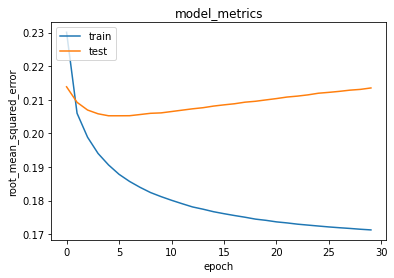

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###Predict

In [ ]:
movie_data = data_cb
df = pd.read_csv('/content/movielens-20m-dataset/rating.csv')

In [ ]:
userId = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == userId]

In [ ]:
movie_watched_by_user

,userId,movieId,rating,timestamp
7560806,52114,1,4.0,2000-04-27 05:48:14
7560807,52114,2,3.0,2000-04-27 05:06:26
7560808,52114,14,3.0,2000-04-27 05:39:35
7560809,52114,21,3.0,2000-04-27 04:43:23
7560810,52114,25,4.0,2000-04-27 05:07:04
...,...,...,...,...
7561268,52114,3527,2.0,2000-04-27 03:31:42
7561269,52114,3545,5.0,2000-04-27 03:24:04
7561270,52114,3547,4.0,2000-04-27 04:30:19
7561271,52114,3559,5.0,2000-04-27 03:16:31


In [ ]:
movie_not_watched = movie_data[~movie_data['movieId'].isin(movie_watched_by_user.movieId.values)]['movieId'] 
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)
len(movie_not_watched)

12686

In [ ]:
movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]

user_encoder = user_to_user_encoded.get(userId)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

In [ ]:
targets = model.predict(user_movie_array).flatten()
targets

397/397 [==============================] - 1s 2ms/step


array([0.7852248 , 0.5213646 , 0.45766503, ..., 0.6472017 , 0.22606431,
       0.55453956], dtype=float32)

In [ ]:
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(userId))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)
 
top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
movie_data_rows = movie_data[movie_data['movieId'].isin(top_movie_user)]
for row in movie_data_rows.itertuples():
    print(row.title, ':', row.genres)
 
print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)
 
recommended_movie = movie_data[movie_data['movieId'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genres)

397/397 [==============================] - 1s 2ms/step
Showing recommendations for users: 52114
movie with high ratings from user
--------------------------------
North by Northwest (1959) : Action|Adventure|Mystery|Romance|Thriller
Maltese Falcon, The (1941) : Film-Noir|Mystery
My Fair Lady (1964) : Comedy|Drama|Musical|Romance
Wizard of Oz, The (1939) : Adventure|Children|Fantasy|Musical
Manon of the Spring (Manon des sources) (1986) : Drama
--------------------------------
Top 10 movie recommendation
--------------------------------
Song of the Little Road (Pather Panchali) (1955) : Drama
Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991) : Comedy
Wild Reeds (Les roseaux sauvages) (1994) : Drama
Songs From the Second Floor (Sånger från andra våningen) (2000) : Drama
Gigantic (A Tale of Two Johns) (2002) : Documentary
Miracle of Morgan's Creek, The (1944) : Comedy|Romance
Sacrifice, The (Offret - Sacraficatio) (1986) : Drama
Kingdom II, The (Riget II) (